#About the dataset

The data is related to direct marketing campaign direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed i


bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')


---



related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric).

Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.



---



other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')



---


social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

EURIBOR 3 Month Rate is a daily financial indicator that represents the interest rate at which Eurozone banks borrow funds from each other for a period of three months. EURIBOR stands for "Euro Interbank Offered Rate" and is calculated and published daily by the European Money Markets Institute (EMMI).

20 - nr.employed: number of employees - quarterly indicator (numeric)



---



Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')





In [1]:
#importing the data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings("ignore")

# # By using the "warnings.filterwarnings("ignore")" command, the code is telling Python to suppress any warning messages that might be generated
# during the execution of the program. This means that any warnings that would have been displayed to the user will now be ignored and not shown.

# # It's important to note that ignoring warnings can sometimes lead to unexpected behavior or errors that are
# difficult to diagnose, so it's generally a good practice to pay attention to warnings and address them if possible.
#  However, in some cases, it may be necessary to ignore warnings if they are known to be harmless or if addressing them is not feasible.

In [2]:
data=pd.read_csv('bank-additional-full_final (1).csv')
data.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


In [3]:
data=pd.read_csv('bank-additional-full_final (1).csv', sep=';')

In [4]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41194,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41195,74.0,NaN,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41196,74.0,retired,married,NaN,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45.0,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59.0,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41.0,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24.0,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25.0,services,single,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
#to see how many unique values we are having in job column
data['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1726
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [6]:
for i in data.columns:
  print(data[i].value_counts())

age
31.0    1947
32.0    1846
33.0    1833
36.0    1780
35.0    1759
        ... 
89.0       2
98.0       2
91.0       2
87.0       1
95.0       1
Name: count, Length: 78, dtype: int64
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1726
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
marital
married     24934
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5249
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
default
no         32595
unknown     8597
yes            3
Name: count, dtype: int64
housing
yes        21584
no         18622
unknown 

In [7]:
data.shape

(41199, 21)

In [8]:
data.info() # summary of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [9]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41195.000000,41196.000000,41196.000000,41196.000000,41196.000000,41196.000000,41195.000000,41196.000000,41196.000000,41196.000000
mean,40.030319,258.281265,2.567676,962.482547,0.173124,0.081656,93.575867,-40.504600,3.620787,5166.996405
std,10.431818,259.254211,2.769751,186.893451,0.494987,1.570894,0.578999,4.629972,1.734655,72.300104
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
col_list = list(data.columns)
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [11]:
# Null values are problem for ML model

# Drop the null values
# Impute/Fill it with Mean, Median, Mode(for object data)

In [13]:
#check for the null values
data.isnull().sum()

# is null() -> count of NAN values
# is na() -> count of NAN + empty values

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 3
dtype: int64

Missing values can be replaced in two ways based on thier data type.

If colums are numerical we'll be replacing it by either mean /median .
        
If columns are object format or string we'll be replacing value by mode .

In [20]:
# If you want to drop
data = data.dropna()

In [21]:
# data["age"] = data["age"].fillna(data["age"].mean())

In [22]:
# data["age"].mean()

In [23]:
# for col in col_list:
#     if data[col].dtypes=='object':
#         data[col]=data[col].fillna(data[col].mode()[0])
#     else:
#         data[col]=data[col].fillna(data[col].mean())

<ipython-input-24-2b42a06df992>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["age"])


<Axes: xlabel='age', ylabel='Density'>

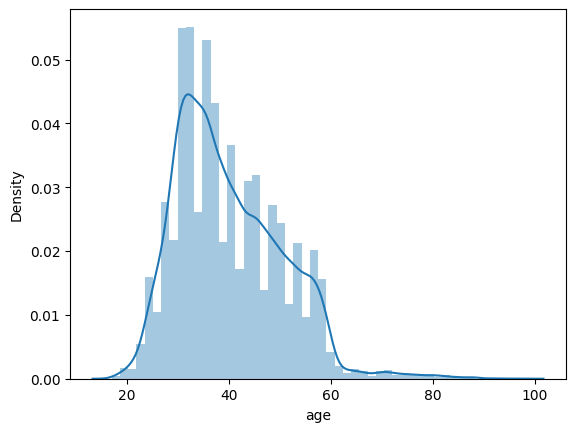

In [24]:
sns.distplot(data["age"])


In [25]:
#check for the null values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [26]:
data.shape

(41190, 21)

In [27]:
#target column
data['y']

0         no
1         no
2         no
3         no
4         no
        ... 
41185     no
41186    yes
41187     no
41193     no
41194     no
Name: y, Length: 41190, dtype: object

In [28]:
#data['y'] = np.where(data['y']=='yes',1,0) #to replace the categorical values by numerical values

In [29]:
data['y'].dtype

dtype('O')

In [30]:
data.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

# Boxplot

Using boxplot we will be visualizing the outliers,after that we will be using IQR method and handling the outliers.

with the help of boxplot we can visualize that 'age','duration','campaign','cons.conf.idx' columns has a outlier.1

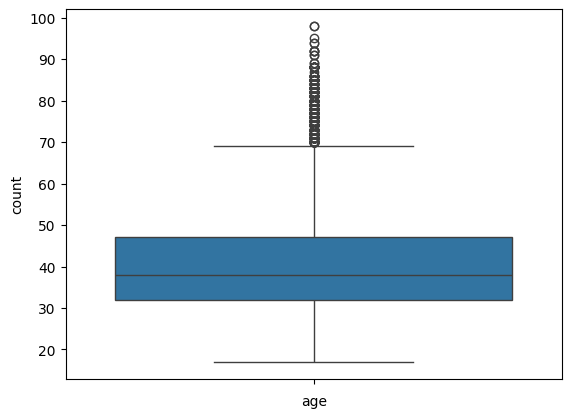

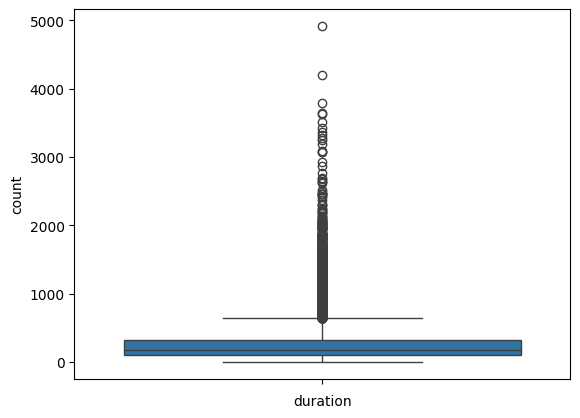

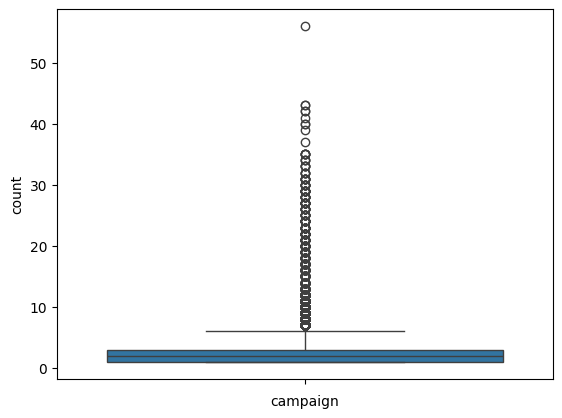

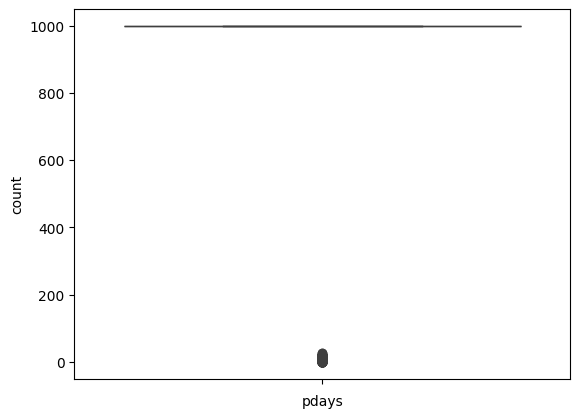

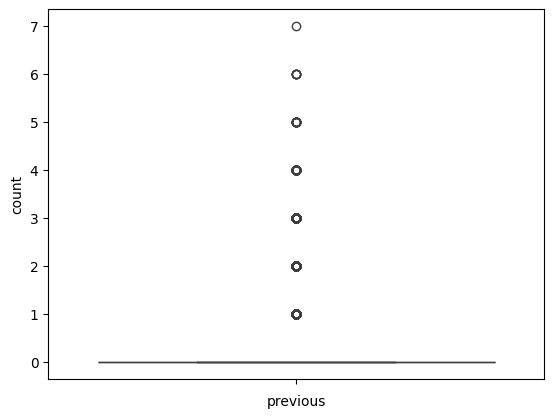

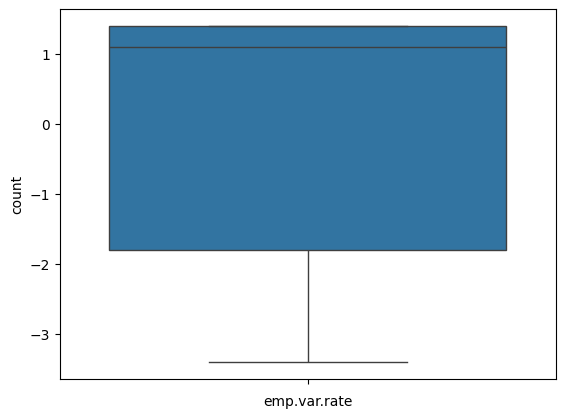

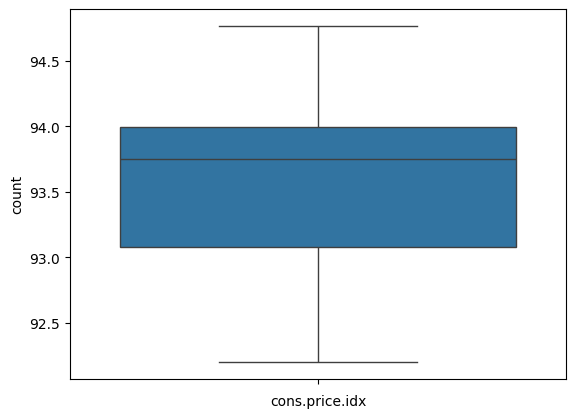

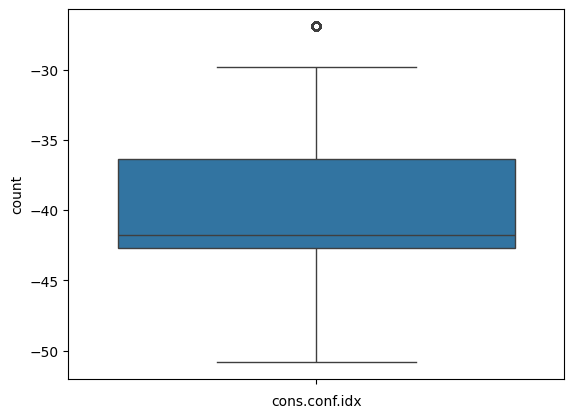

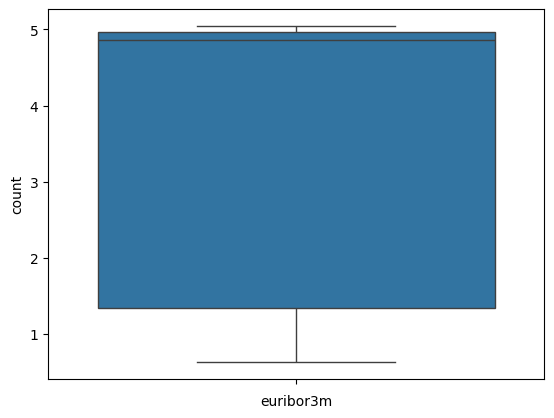

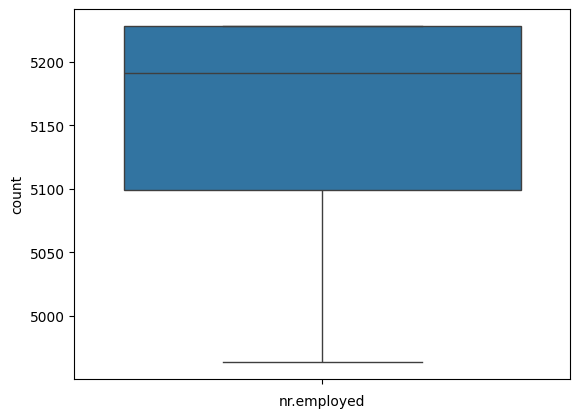

In [31]:
#Outliers detection
#Boxplot - to visualize the outliers

for col_name in col_list:
    if(data[col_name].dtypes=='int64' or data[col_name].dtypes=='float64'):
        sns.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

# IQR method

Now with the IQR method we will be removing the outlier


The interquartile range is calculated in much the same way as the range. All you do to find it is subtract the first quartile from the third quartile: IQR = Q3 – Q1. The interquartile range shows how the data is spread about the median


(data >= Q1 - 1.5*IQR) & (data <= Q3 + 1.5*IQR)

Where 1.5 is standard range set to check the outliers

So with the help of above formula and IQR value we can remove the outliers ,to remove the outliers we have to calculate the values within upper and lower limit

IQR=Q3-Q1

lower limit=Q1-1.5*IQR
upper limit=Q3+1.5*IQR

so consider for age column

Q1 = data.age.quantile(0.25)
Q3 = data.age.quantile(0.75)
IQR = Q3 - Q1
print(Q1-1.5*IQR,Q3+1.5*IQR)

(9.5 , 69.5)

so we'll consider values between (9.5 , 69.5) and rest all values will be outliers.

Same follows for all 4 ('age','duration','campaign','cons.conf.idx' ) columns

In [32]:

#handling the outliers
Q1 = data.age.quantile(0.25)
Q3 = data.age.quantile(0.75)
IQR = Q3-Q1
data = data[(data.age>=Q1-1.5*IQR) & (data.age<= Q3+1.5*IQR)]

Q1 = data.duration.quantile(0.25)
Q3 = data.duration.quantile(0.75)
IQR = Q3-Q1
data = data[(data.duration>=Q1-1.5*IQR) & (data.duration<= Q3+1.5*IQR)]

Q1 = data.campaign.quantile(0.25)
Q3 = data.campaign.quantile(0.75)
IQR = Q3-Q1
data = data[(data.campaign>=Q1-1.5*IQR) & (data.campaign<= Q3+1.5*IQR)]

Q1 = data['cons.conf.idx'].quantile(0.25)
Q3 = data['cons.conf.idx'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['cons.conf.idx'] >= Q1 - 1.5*IQR) & (data['cons.conf.idx'] <= Q3 + 1.5*IQR)]

In [33]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

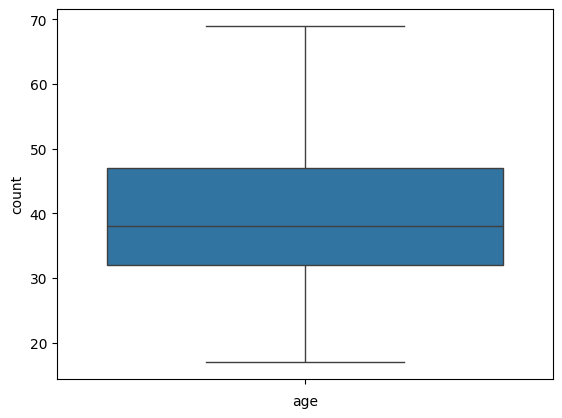

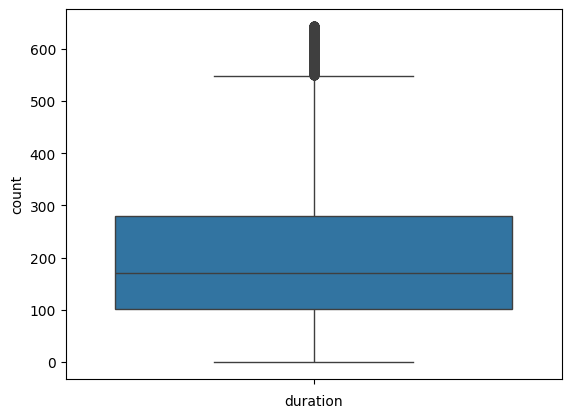

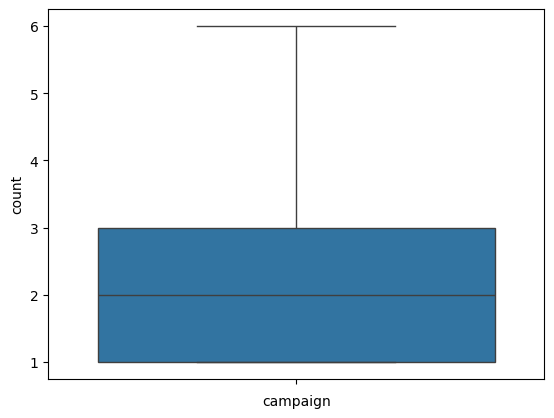

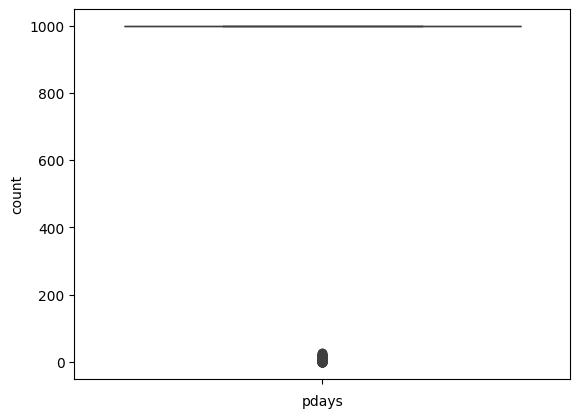

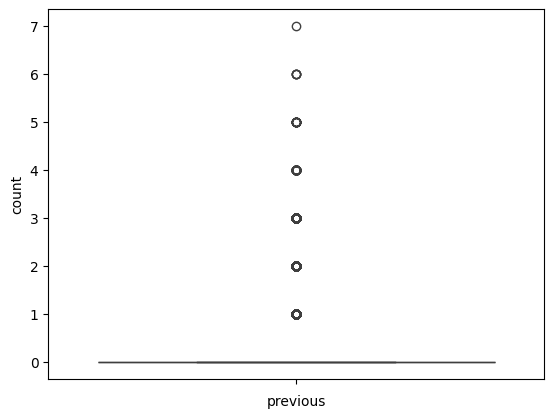

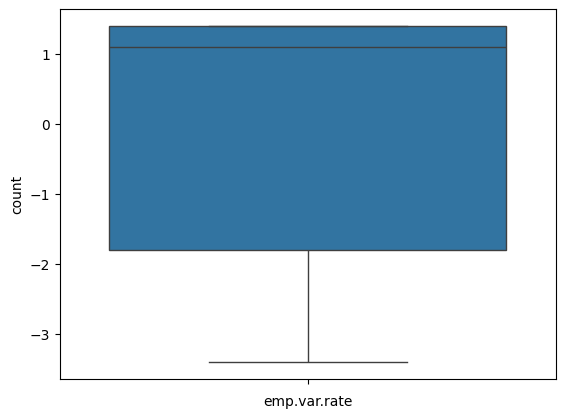

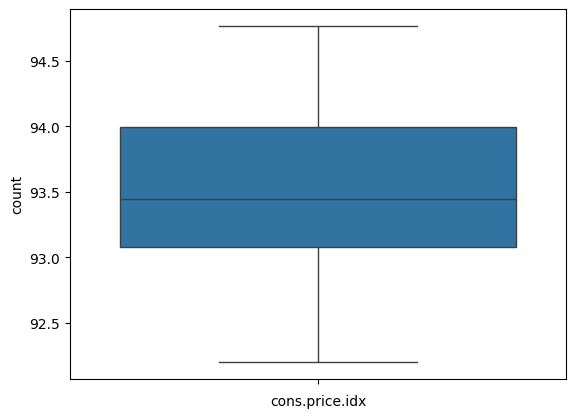

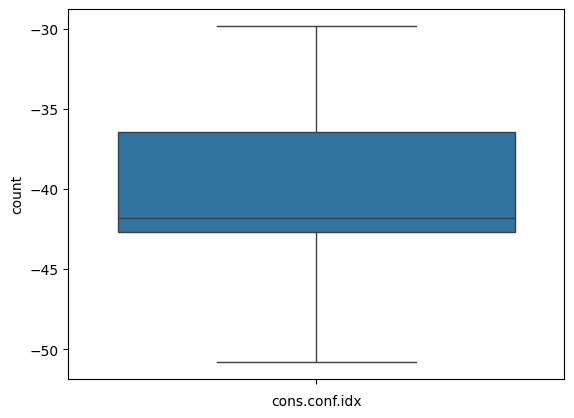

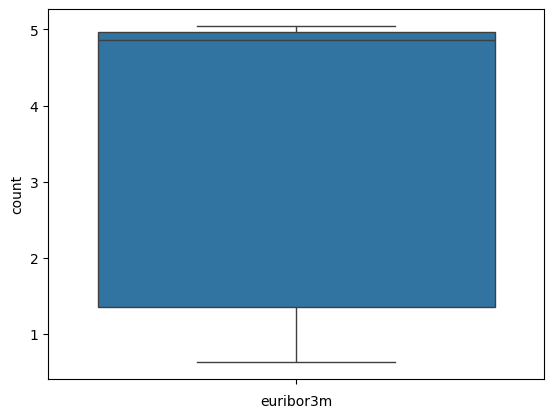

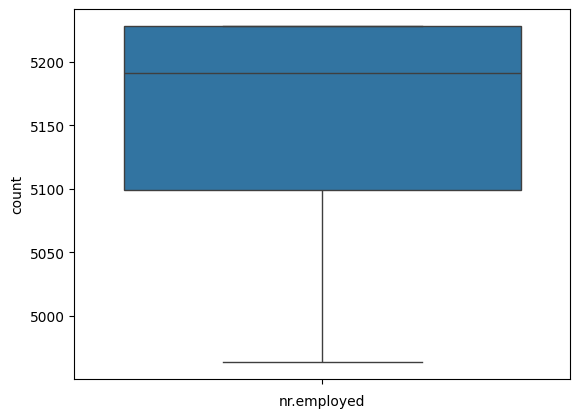

In [34]:
for col_name in col_list:
    if(data[col_name].dtypes=='int64' or data[col_name].dtypes=='float64'):
        sns.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

So we are done with Handling outliers so once again we'll plot the box plot and check the difference before and after.

From the above box plot we can visualize that all the outliers have been removed .

In [35]:
#Feature Selection
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [36]:
data['age'].nunique()

53

Bin values into discrete intervals.

Use `cut` when you need to segment and sort data values into bins. This
function is also useful for going from a continuous variable to a
categorical variable.


In [37]:
#Binning - grouping the data
bins = [0,20,40,60,80,100]
data['age'] = pd.cut(data['age'],bins)

In [38]:
data['age'] = data['age'].astype(str)

In [39]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,"(40, 60]",housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,"(40, 60]",services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,"(20, 40]",services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,"(20, 40]",admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,"(40, 60]",services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [40]:
data['age'].value_counts()

age
(20, 40]    20434
(40, 60]    14245
(60, 80]      368
(0, 20]       129
Name: count, dtype: int64

In [41]:
data.corr(numeric_only = True)

,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
duration,1.000000,-0.056893,-0.073909,0.045916,-0.051520,0.001185,-0.002758,-0.059965,-0.078609
campaign,-0.056893,1.000000,0.042119,-0.057014,0.089151,0.066982,-0.005851,0.074389,0.084543
pdays,-0.073909,0.042119,1.000000,-0.574394,0.261045,0.064597,-0.072240,0.288819,0.368915
previous,0.045916,-0.057014,-0.574394,1.000000,-0.420139,-0.200582,-0.088658,-0.453300,-0.502056
emp.var.rate,-0.051520,0.089151,0.261045,-0.420139,1.000000,0.767748,0.309296,0.972556,0.901906
cons.price.idx,0.001185,0.066982,0.064597,-0.200582,0.767748,1.000000,0.148943,0.681502,0.503828
cons.conf.idx,-0.002758,-0.005851,-0.072240,-0.088658,0.309296,0.148943,1.000000,0.373474,0.200454
euribor3m,-0.059965,0.074389,0.288819,-0.453300,0.972556,0.681502,0.373474,1.000000,0.943611
nr.employed,-0.078609,0.084543,0.368915,-0.502056,0.901906,0.503828,0.200454,0.943611,1.000000


In [42]:
data.dtypes

age                object
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
# #convert all the independent categorical columns into numerical columns:
# ->Label encoding

In [45]:
col_list = []
for col in data.columns:
    if ((data[col].dtype == 'object') | (col == 'y' )):
        col_list.append(col)

In [46]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [ ]:
# class A

#obj = A()

In [47]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in col_list:
  data[i] = le.fit_transform(data[i])

In [48]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,2,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,2,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,1,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,1,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,2,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,1,0,1,6,0,2,0,0,7,0,...,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41182,1,10,2,0,0,2,0,0,7,0,...,1.0,9.0,1.0,2,-1.1,94.767,-50.8,1.028,4963.6,0
41184,2,1,1,5,0,0,0,0,7,0,...,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,2,5,1,6,0,2,0,0,7,0,...,2.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6,0


In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35176 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             35176 non-null  int64  
 1   job             35176 non-null  int64  
 2   marital         35176 non-null  int64  
 3   education       35176 non-null  int64  
 4   default         35176 non-null  int64  
 5   housing         35176 non-null  int64  
 6   loan            35176 non-null  int64  
 7   contact         35176 non-null  int64  
 8   month           35176 non-null  int64  
 9   day_of_week     35176 non-null  int64  
 10  duration        35176 non-null  float64
 11  campaign        35176 non-null  float64
 12  pdays           35176 non-null  float64
 13  previous        35176 non-null  float64
 14  poutcome        35176 non-null  int64  
 15  emp.var.rate    35176 non-null  float64
 16  cons.price.idx  35176 non-null  float64
 17  cons.conf.idx   35176 non-null  floa

# VIF

A variance inflation factor (VIF) is  a measure of multicollinearity among the independent variables in a multiple regression model.


Finding  multicollinearity is important because while multicollinearity does not reduce the explanatory power of the model, it does reduce the statistical significance of the independent variables.


A large variance inflation factor (VIF) on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables.


So we'll consider the VIF values <=5 ,rest all we'll remove the featuers with value >5.


#VIF - multicollinearity
A variance inflation factor (VIF) is  a measure of multicollinearity among the independent variables in a multiple regression model.

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

#sum(a , b)

,feature,VIF
0,age,9.810625
1,job,2.101041
2,marital,5.403114
3,education,4.569710
4,default,1.401753
5,housing,2.212288
6,loan,1.208225
7,contact,2.942308
8,month,6.689309
9,day_of_week,3.099339


In [ ]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,3,1,0,0,0,0,1,6,1,261.000000,1.000000,999.000000,0.000000,1,1.100000,93.994000,-36.4000,4.857000,5191.000000
1,1,7,1,3,1,0,0,1,6,1,149.000000,1.000000,999.000000,0.000000,1,1.100000,93.994000,-36.4000,4.857000,5191.000000
2,0,7,1,3,0,2,0,1,6,1,226.000000,1.000000,999.000000,0.000000,1,1.100000,93.994000,-36.4000,4.857000,5191.000000
3,0,0,1,1,0,0,0,1,6,1,151.000000,1.000000,999.000000,0.000000,1,1.100000,93.994000,-36.4000,4.857000,5191.000000
4,1,7,1,3,0,0,2,1,6,1,307.000000,1.000000,999.000000,0.000000,1,1.100000,93.994000,-36.4000,4.857000,5191.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41186,0,9,1,5,0,0,0,0,7,0,442.000000,1.000000,999.000000,0.000000,1,-1.100000,94.767000,-50.8000,1.028000,4963.600000
41188,0,0,1,6,0,2,0,0,6,2,258.281265,2.567676,962.482547,0.173124,1,0.081656,93.575867,-40.5046,3.620787,5166.996405
41189,0,5,1,5,0,2,0,0,7,0,239.000000,3.000000,999.000000,1.000000,1,-1.100000,94.767000,-50.8000,1.028000,4963.600000
41191,0,0,1,6,0,2,0,0,6,2,258.281265,2.567676,962.482547,0.173124,1,0.081656,93.575867,-40.5046,3.620787,5166.996405


In [51]:
data=data.drop(['nr.employed'], axis = 1)

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,age,9.800076
1,job,2.100792
2,marital,5.401861
3,education,4.567856
4,default,1.398926
5,housing,2.211964
6,loan,1.208179
7,contact,2.444916
8,month,5.784950
9,day_of_week,3.098503


In [53]:
data=data.drop(['cons.price.idx'], axis = 1)

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,age,9.526339
1,job,2.095137
2,marital,5.311696
3,education,4.511676
4,default,1.398437
5,housing,2.210205
6,loan,1.207618
7,contact,2.347620
8,month,5.722566
9,day_of_week,3.084959


In [55]:
data=data.drop(['pdays'], axis = 1)

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,age,9.330818
1,job,2.091739
2,marital,5.234658
3,education,4.455435
4,default,1.397786
5,housing,2.206230
6,loan,1.207474
7,contact,2.271366
8,month,5.654588
9,day_of_week,3.072971


In [57]:
data=data.drop(['euribor3m'], axis = 1)

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,age,8.568249
1,job,2.084396
2,marital,5.120318
3,education,4.272311
4,default,1.397668
5,housing,2.196750
6,loan,1.207193
7,contact,2.259536
8,month,5.268834
9,day_of_week,3.029292


In [59]:
data=data.drop(['cons.conf.idx'], axis = 1)

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,age,6.710375
1,job,2.068770
2,marital,4.395583
3,education,4.093623
4,default,1.389730
5,housing,2.143361
6,loan,1.202816
7,contact,2.242027
8,month,4.745845
9,day_of_week,2.936145


In [61]:
data=data.drop(['poutcome'], axis = 1)

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,age,6.005069
1,job,2.060488
2,marital,4.137827
3,education,3.966430
4,default,1.389648
5,housing,2.130824
6,loan,1.202033
7,contact,2.230000
8,month,4.705632
9,day_of_week,2.894133


In [63]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,y
0,2,3,1,0,0,0,0,1,6,1,261.0,1.0,0.0,1.1,0
1,2,7,1,3,1,0,0,1,6,1,149.0,1.0,0.0,1.1,0
2,1,7,1,3,0,2,0,1,6,1,226.0,1.0,0.0,1.1,0
3,1,0,1,1,0,0,0,1,6,1,151.0,1.0,0.0,1.1,0
4,2,7,1,3,0,0,2,1,6,1,307.0,1.0,0.0,1.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,1,0,1,6,0,2,0,0,7,0,281.0,1.0,0.0,-1.1,1
41182,1,10,2,0,0,2,0,0,7,0,112.0,1.0,1.0,-1.1,0
41184,2,1,1,5,0,0,0,0,7,0,383.0,1.0,0.0,-1.1,0
41185,2,5,1,6,0,2,0,0,7,0,189.0,2.0,0.0,-1.1,0


In [64]:
# First step : checking the data is supervised or unsupervised
# 2 step -> suppose the data is supervised -> regression or classification
# 3 step -> seperate features and target , x -> features , y -> target
# 4 -> train - test - split
# 5 -> build the model
# 6 -> train the model
# 7 -> testing/ Predictions
# 8 -> evaluating the model -> regression -> r2 score
#                              classification -> accuracy

In [65]:
##Model building

In [66]:
Ind_features = list(data.columns)
Ind_features.remove('y')

x = data[Ind_features] #features
y = data['y'] #target variable

In [67]:
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate
0,2,3,1,0,0,0,0,1,6,1,261.0,1.0,0.0,1.1
1,2,7,1,3,1,0,0,1,6,1,149.0,1.0,0.0,1.1
2,1,7,1,3,0,2,0,1,6,1,226.0,1.0,0.0,1.1
3,1,0,1,1,0,0,0,1,6,1,151.0,1.0,0.0,1.1
4,2,7,1,3,0,0,2,1,6,1,307.0,1.0,0.0,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,1,0,1,6,0,2,0,0,7,0,281.0,1.0,0.0,-1.1
41182,1,10,2,0,0,2,0,0,7,0,112.0,1.0,1.0,-1.1
41184,2,1,1,5,0,0,0,0,7,0,383.0,1.0,0.0,-1.1
41185,2,5,1,6,0,2,0,0,7,0,189.0,2.0,0.0,-1.1


In [68]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41181    1
41182    0
41184    0
41185    0
41186    1
Name: y, Length: 35176, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=898)

In [70]:
x_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate
20943,2,1,1,0,1,2,0,0,1,2,240.0,1.0,0.0,1.4
12219,1,0,0,5,1,0,0,1,3,2,343.0,2.0,0.0,1.4
14997,1,0,2,3,0,2,0,0,3,2,80.0,1.0,0.0,1.4
29553,1,0,1,3,0,2,2,1,0,1,24.0,1.0,2.0,-1.8
12188,2,7,2,5,0,2,0,1,3,3,143.0,1.0,0.0,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33418,1,1,1,2,0,2,2,0,6,3,31.0,4.0,0.0,-1.8
5676,2,4,1,6,0,0,2,1,6,1,312.0,1.0,0.0,1.1
20285,1,0,2,6,0,0,2,0,1,1,312.0,3.0,0.0,1.4
246,1,9,2,5,0,0,0,1,6,1,79.0,1.0,0.0,1.1


In [71]:
y_train

20943    0
12219    0
14997    0
29553    0
12188    0
        ..
33418    0
5676     0
20285    0
246      0
12408    0
Name: y, Length: 26382, dtype: int64

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
logisticRegr = LogisticRegression()

In [74]:
#####Model Fitting/Training###
logisticRegr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
test_pred = logisticRegr.predict(x_test)

In [76]:
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [77]:
pred = pd.DataFrame()
pred["y_test"] = y_test #actual answer key
pred["y_pred"] = test_pred #answers given by model
pred

,y_test,y_pred
25401,0,0
40044,0,0
22636,0,0
13004,0,0
19213,0,0
...,...,...
40310,1,0
40005,1,0
34888,0,0
20514,0,0


In [78]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,test_pred)

0.9244939731635206

In [79]:
confusion_matrix(y_test,test_pred)

array([[7989,  119],
       [ 545,  141]])

In [ ]:
predicted_probabilities = logisticRegr.predict_proba(x_test)
predicted_probabilities = pd.DataFrame(predicted_probabilities)
predicted_probabilities

,0,1
0,0.865755,0.134245
1,0.958600,0.041400
2,0.681968,0.318032
3,0.983650,0.016350
4,0.648248,0.351752
...,...,...
8790,0.967157,0.032843
8791,0.988804,0.011196
8792,0.662874,0.337126
8793,0.865863,0.134137
